In [1]:
import json
import re

raw_log = open("standard_rb_sched.log", "r")
raw_log_str = raw_log.read()

all_seqs = re.finditer(
    r"Generating standard RB Clifford sequence \(n=\d+, desired_net_cl=I\) for qubit q1\nRB Clifford sequece indices: \[\s*([\d\s]+)\]\nClifford decomposition strategy: epstein",
    raw_log_str,
    flags=re.S
)


In [2]:

cl_op_log = []

counter = 0
for id_seq in all_seqs:
    ids = [int(idstr) for idstr in id_seq.group(1).split()]
    if counter == 0:
        curr_sched_ids = []
        cl_op_log.append(curr_sched_ids)
    curr_sched_ids.append(ids)
    counter += 1 
    counter %= 39


In [3]:
import numpy as np
rb_data = []

with open("rb_data_0.61.npy", "rb") as f:
    for i in range(200):
        data = np.load(f)
        rb_data.append(data)
        
raw_rb_data = np.reshape(rb_data,(200,39))

In [4]:
final_data = []
for i in range(200):
     curr_cl_op_list= cl_op_log[i]
     curr_rb_p0_list = raw_rb_data[i]
     for j in range(39):
        combined_data = {}
        combined_data["cl_ops"] = curr_cl_op_list[j]
        combined_data["p0"] = float(curr_rb_p0_list[j])
        final_data.append(combined_data)

In [5]:

f = open("standard_rb_1q_full_data.json", "w")
jdata = json.dumps(final_data, indent=4)
f.write(jdata)

3147065

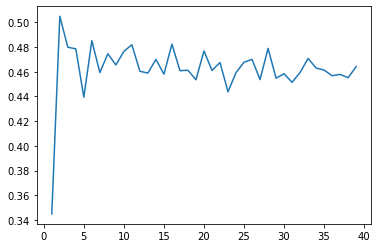

In [6]:
rb_x = np.arange(1, 40)

import matplotlib.pyplot as plt
import numpy as np

avg_rb_data = np.mean(raw_rb_data, axis=0)
plt.plot(rb_x, avg_rb_data)